In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [93]:
waves = pd.read_csv('Coastal Data System Waves.csv', index_col=0, parse_dates=True,nrows=24000)

#### HS = Wave Height- an average of the highest third of the waves in a recrod

#### HMAX = the maximum wave height in the record

#### TZ = The zero upcrossing wave period

#### TP = The peak energy wave period

#### Peak Direction =  Direction (related to true north) from which the peak period waves are coming from

#### SST = Approximation of sea surface temp

In [59]:
waves.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
Date/Time,,,,,,
2017-01-01 00:00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
2017-01-01 00:30:00,0.875,1.39,4.421,4.506,-99.9,-99.90
2017-01-01 01:00:00,0.763,1.15,4.520,5.513,49.0,25.65
2017-01-01 01:30:00,0.770,1.41,4.582,5.647,75.0,25.50
2017-01-01 02:00:00,0.747,1.16,4.515,5.083,91.0,25.45


In [60]:
waves.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,1.078070,1.940602,5.409213,8.779722,97.216429,23.398892
std,4.211771,4.311303,4.461254,5.133220,31.218416,11.496017
min,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,0.836000,1.410000,4.911000,7.227000,85.000000,22.500000
50%,1.131000,1.910000,5.489000,8.823000,101.000000,24.400000
75%,1.561000,2.630000,6.142000,10.693250,116.000000,26.400000
max,3.520000,7.030000,10.921000,17.424000,257.000000,28.650000


In [61]:
waves.columns

Index(['Hs', 'Hmax', 'Tz', 'Tp', 'Peak Direction', 'SST'], dtype='object')

In [62]:
waves.shape

(24000, 6)

In [63]:
waves.isnull().sum()

Hs                0
Hmax              0
Tz                0
Tp                0
Peak Direction    0
SST               0
dtype: int64

In [64]:
# Remove Outliers
wave_data= waves[(np.abs(stats.zscore(waves)) < 3).all(axis=1)]
wave_data.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,23766.000000,23766.000000,23766.000000,23766.000000,23766.000000,23766.000000
mean,1.252171,2.117011,5.596303,8.981770,98.735042,24.438816
std,0.538995,0.917387,0.959799,2.471655,25.072625,2.104777
min,0.294000,0.530000,3.076000,2.720000,11.000000,20.500000
25%,0.837000,1.410000,4.923000,7.248000,85.000000,22.550000
50%,1.133000,1.910000,5.497000,8.837000,101.000000,24.450000
75%,1.566000,2.640000,6.151000,10.706000,116.000000,26.400000
max,3.520000,7.030000,10.921000,17.424000,185.000000,28.650000


In [65]:
wave_data = wave_data.rename({'Hs': 'Average_Significant_WH', 'Hmax': 'Maximum_WH', 'Tz': 'ZeroUpcrossing_WP', 'Tp': 'PeakEnegery_WP', 'SST': 'Sea_Temp'}, axis=1)  # new method
wave_data.index.names = ['Date']

In [66]:
wave_data.head()

,Average_Significant_WH,Maximum_WH,ZeroUpcrossing_WP,PeakEnegery_WP,Peak Direction,Sea_Temp
Date,,,,,,
2017-01-01 01:00:00,0.763,1.15,4.520,5.513,49.0,25.65
2017-01-01 01:30:00,0.770,1.41,4.582,5.647,75.0,25.50
2017-01-01 02:00:00,0.747,1.16,4.515,5.083,91.0,25.45
2017-01-01 02:30:00,0.718,1.61,4.614,6.181,68.0,25.45
2017-01-01 03:00:00,0.707,1.34,4.568,4.705,73.0,25.50


### <center> Figure No.1 </center>

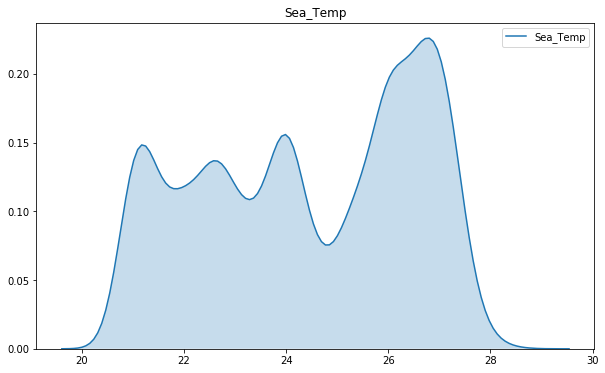

In [67]:
plt.figure(figsize=(10,6)) 
plt.title("Sea_Temp") 
sns.kdeplot(data=wave_data['Sea_Temp'], label="Sea_Temp", shade=True)

### <center> Figure No.2 </center>

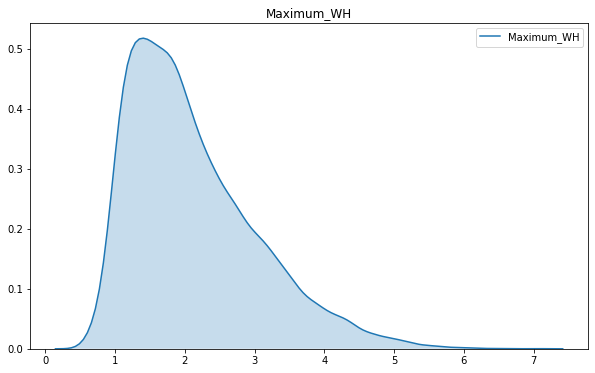

In [68]:
plt.figure(figsize=(10,6))
plt.title("Maximum_WH") 
sns.kdeplot(data=wave_data['Maximum_WH'], label="Maximum_WH", shade=True)

### <center> Figure No.3 </center>

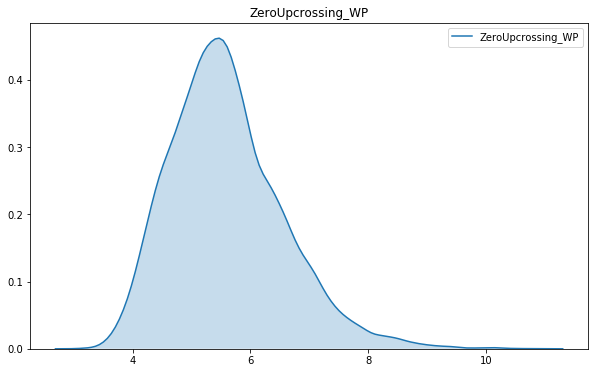

In [69]:
plt.figure(figsize=(10,6))
plt.title("ZeroUpcrossing_WP") 
sns.kdeplot(data=wave_data['ZeroUpcrossing_WP'], label="ZeroUpcrossing_WP", shade=True)

### <center> Figure No.4 </center>

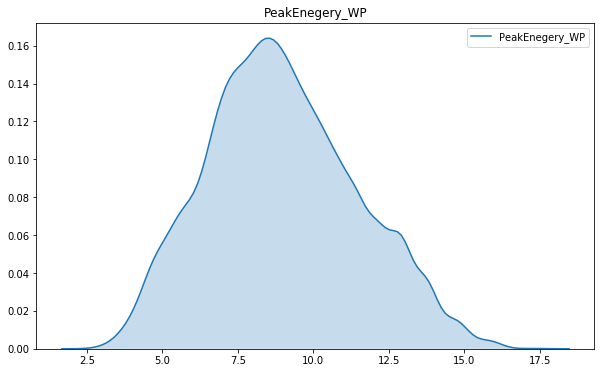

In [70]:
plt.figure(figsize=(10,6))
plt.title("PeakEnegery_WP") 
sns.kdeplot(data=wave_data['PeakEnegery_WP'], label="PeakEnegery_WP", shade=True)

### <center> Figure No.5 </center>

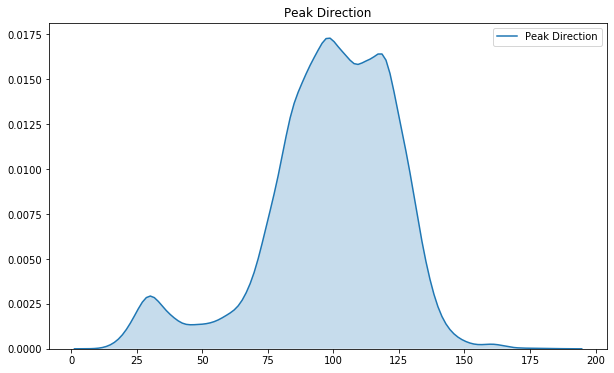

In [71]:
plt.figure(figsize=(10,6))
plt.title("Peak Direction") 
sns.kdeplot(data=wave_data['Peak Direction'], label="Peak Direction", shade=True)

### <center> Figure No.6 </center>

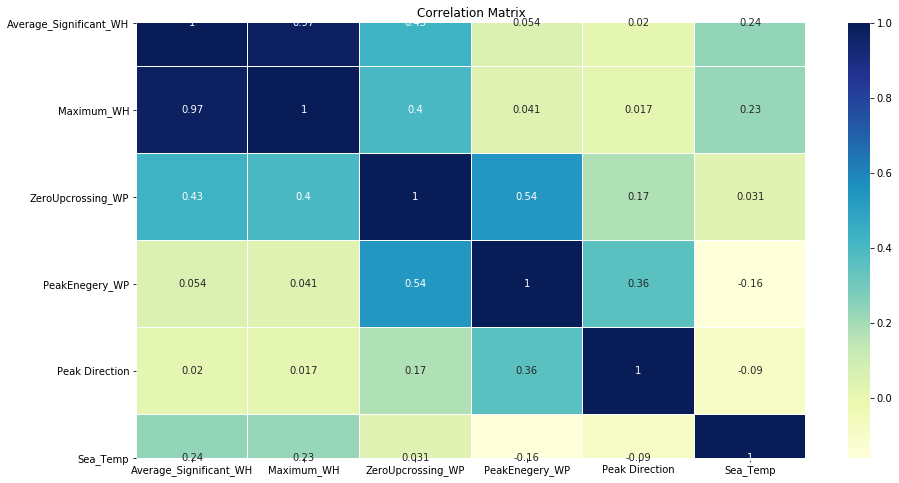

In [96]:
plt.figure(figsize=(15,8))
sns.heatmap(wave_data.corr(), linewidth=.1, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show();

### <center> Figure No.7 </center>

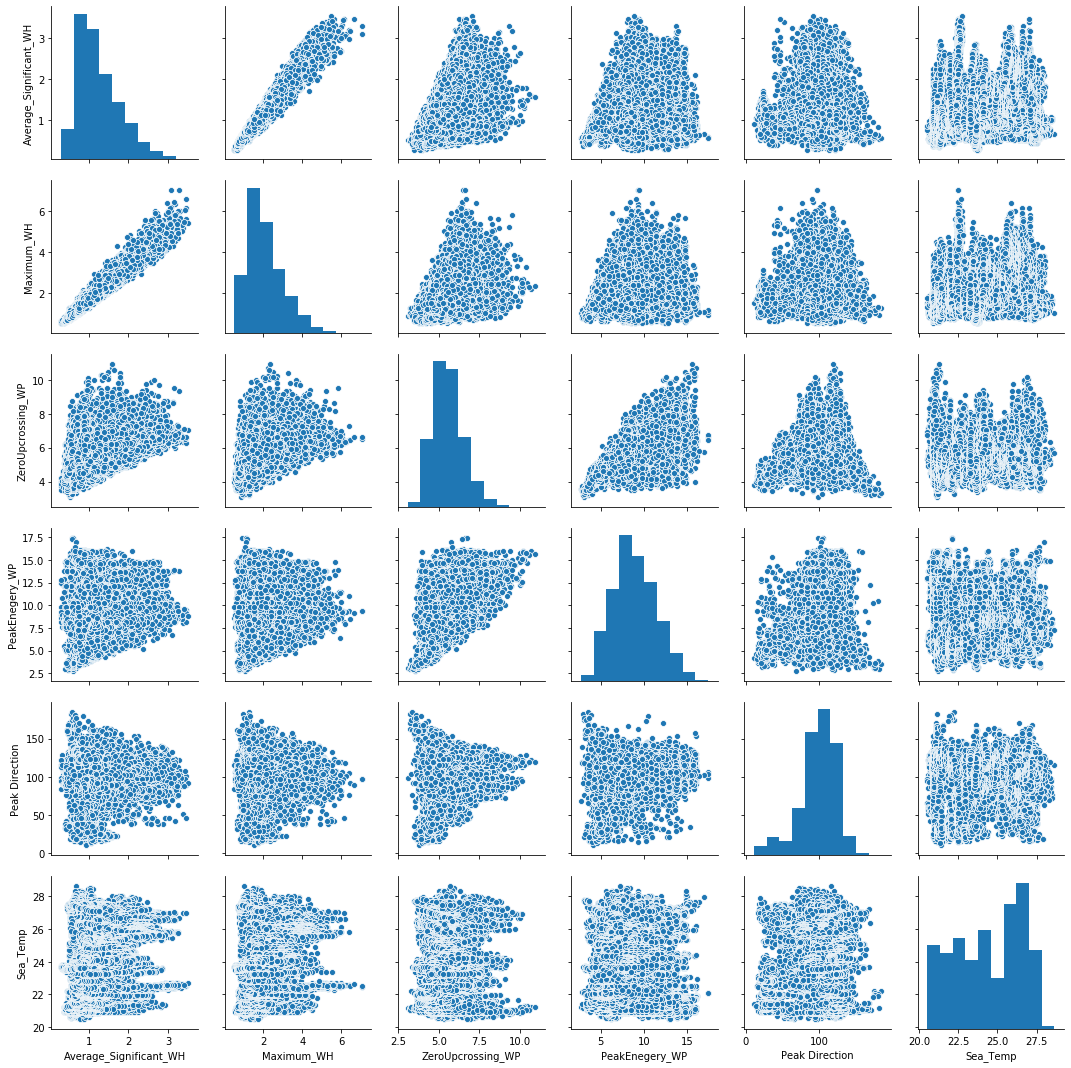

In [88]:
sns.pairplot(wave_data)

#### Takeaways: 

Average_Significant_WH and Maximum_WH seem to have a linear relationship. 

Other potential relationships to look into could be, ZeroUprossing_WP and Average_Significant_WH, ZeroUpcrossing and Maximum_WH, and Peak Direction and ZeroUpcrossing.

### <center> Figure No.8 </center>

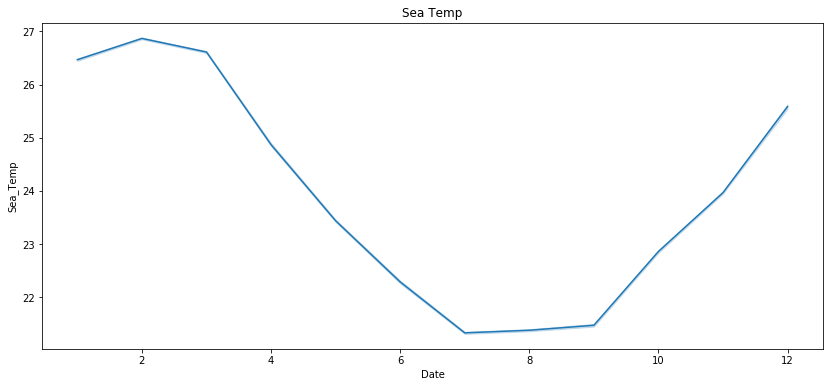

In [82]:
plt.figure(figsize=(14,6))
plt.title("Sea Temp")
sns.lineplot(x=wave_data.index.month, y="Sea_Temp", data=wave_data)

In [83]:
print(wave_data.loc[wave_data['Sea_Temp'].idxmax()])
print('\n',wave_data.loc[wave_data['Sea_Temp'].idxmin()])


Jan = wave_data[(wave_data.index.month.isin([1]))]
Feb = wave_data[(wave_data.index.month.isin([2]))]
July = wave_data[(wave_data.index.month.isin([7]))]
Aug = wave_data[(wave_data.index.month.isin([8]))]

JanAv = Jan['Sea_Temp'].mean()
FebAv = Feb['Sea_Temp'].mean()
JulyAv = July['Sea_Temp'].mean()
AugAv = Aug['Sea_Temp'].mean()

print("\nJan:",JanAv,"\nFeb:",FebAv,"\nJuly:",JulyAv,"\nAug:",AugAv)

Average_Significant_WH      0.664
Maximum_WH                  1.040
ZeroUpcrossing_WP           5.699
PeakEnegery_WP              7.262
Peak Direction            116.000
Sea_Temp                   28.650
Name: 2018-01-07 13:00:00, dtype: float64

 Average_Significant_WH     0.851
Maximum_WH                 1.550
ZeroUpcrossing_WP          5.328
PeakEnegery_WP             6.159
Peak Direction            66.000
Sea_Temp                  20.500
Name: 2017-07-16 05:30:00, dtype: float64

Jan: 26.468560350640608 
Feb: 26.869323954669795 
July: 21.32824296499666 
Aug: 21.37741717376616


#### Takeaway from this analysis: 


The warmest sea temperature is in Feburary


The Coolest sea temperature is in August

### <center> Figure No.9 </center>

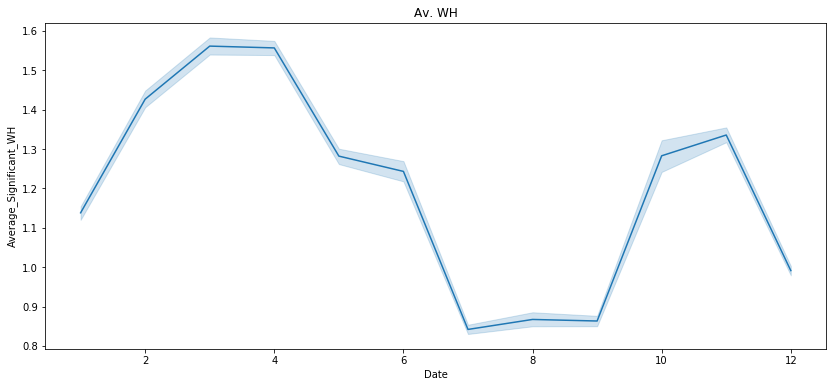

In [86]:
# How big are the waves in summer vs. winter? 
plt.figure(figsize=(14,6))
plt.title("Av. WH")
sns.lineplot(x=wave_data.index.month, y="Average_Significant_WH", data=wave_data)

In [87]:
#Create Summer and Winter Data sets and get averages

Summer = wave_data[(wave_data.index.month.isin([1,2,12]))]
Winter = wave_data[(wave_data.index.month.isin([6,7,8]))]

SummerMax = Summer['Maximum_WH'].mean()
SummerSig = Summer['Average_Significant_WH'].mean()

WinterMax = Winter['Maximum_WH'].mean()
WinterSig = Winter['Average_Significant_WH'].mean()

print("Summer:",SummerMax,SummerSig,"\nWinter:",WinterMax,WinterSig)

Summer: 2.052347410472246 1.212164217434728 
Winter: 1.6646810699588517 0.9822652034750831


Average Max Wave Height in Summer = 2.2

Average Max Wave Height in Winter = 1.7

Average Significant Wave Heigh in Summer = 1.3

Average Significant Wave Heigh in Winter = 1.0

In [104]:
# Scaling all the values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
wave_data = scaler.fit_transform(wave_data)
print('Shape of the scaled data matrix: ', wave_data.shape)

Shape of the scaled data matrix:  (23766, 6)


In [130]:
def plot_df(x, y, title, xlabel, ylabel, dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [132]:
train = wave_data[:23000]
test = wave_data[23000: ]

print('Shape of train: ', train.shape)
print('Shape of test: ', test.shape)

Shape of train data:  (23000, 6)
Shape of test data:  (766, 6)


In [107]:
def prepare_data(wave_data):
    databatch = 30
    x_list = []
    y_list = []
    
    for i in range(len(wave_data)-databatch-1):
        x_list.append(wave_data[i:i+databatch])
        y_list.append(wave_data[i+databatch+1])
        
    X_data = np.array(x_list)
    X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[2], X_data.shape[1]))
    y_data = np.array(y_list)
    
    return X_data, y_data

In [108]:
X_train, y_train = prepare_data(train)
X_test, y_test = prepare_data(test)
print('X_train Shape : ', X_train.shape, 'y_train shape :', y_train.shape)
print('X_test Shape  : ', X_test.shape, ' y_test shape  :', y_test.shape)

X_train Shape :  (22969, 6, 30) y_train shape : (22969, 6)
X_test Shape  :  (735, 6, 30)  y_test shape  : (735, 6)


In [109]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

def lstm_model(x_data, y_data, num_epochs, batch_size, learning_rate):
    model = Sequential()
    model.add(LSTM(32, input_shape=(x_data.shape[1], x_data.shape[2]), return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(10))
    model.add(Dense(6))
    
    optimizer = Adam(lr=learning_rate)
    
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    history = model.fit(x_data, y_data, validation_split=0.25, epochs=num_epochs, batch_size=batch_size)
    
    return model, history

Using TensorFlow backend.


In [110]:
history = lstm_model(X_train, y_train, num_epochs=15, batch_size=200, learning_rate=.001)

Train on 17226 samples, validate on 5743 samples
Epoch 1/15
17226/17226 [==============================] - 5s 290us/step - loss: 0.0423 - accuracy: 0.4875 - val_loss: 0.0185 - val_accuracy: 0.7996
Epoch 2/15
17226/17226 [==============================] - 3s 154us/step - loss: 0.0155 - accuracy: 0.6145 - val_loss: 0.0136 - val_accuracy: 0.8224
Epoch 3/15
17226/17226 [==============================] - 3s 152us/step - loss: 0.0105 - accuracy: 0.6730 - val_loss: 0.0079 - val_accuracy: 0.8623
Epoch 4/15
17226/17226 [==============================] - 3s 160us/step - loss: 0.0086 - accuracy: 0.7148 - val_loss: 0.0070 - val_accuracy: 0.8675
Epoch 5/15
17226/17226 [==============================] - 3s 168us/step - loss: 0.0079 - accuracy: 0.7307 - val_loss: 0.0066 - val_accuracy: 0.8722
Epoch 6/15
17226/17226 [==============================] - 3s 168us/step - loss: 0.0074 - accuracy: 0.7455 - val_loss: 0.0059 - val_accuracy: 0.8760
Epoch 7/15
17226/17226 [==============================] - 3s 17

### <center> Figure No.10 </center>

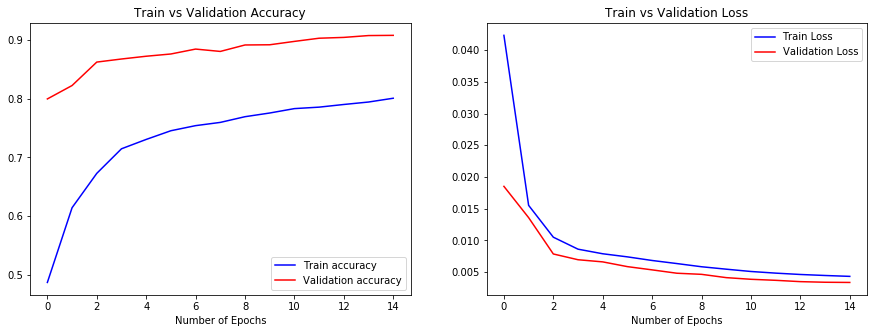

In [111]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history[1].history['accuracy'], color='blue', label='Train accuracy')
plt.plot(history[1].history['val_accuracy'], color='red', label='Validation accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history[1].history['loss'], color='blue', label='Train Loss')
plt.plot(history[1].history['val_loss'], color='red', label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show();